In [1]:
import pandas as pd
from insight_utils import bar_groups_chart, box_plot
from constants import FORMAT_MODIFIERS, RELEVANCE_MODIFIERS, RELEVANCE_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
results_path = "results/gpt-3.5-turbo-16k/"
base_prompt_df = pd.read_csv(results_path + "base_prompt.csv")
relevance_df = pd.read_csv(modifiers_path + "relevance.csv")

#### Format

In [2]:
relevance_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rogue_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,relevant,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,"[0.2620886266231537, 0.20278120040893555, 0.27...","[0.4343434343434343, 0.3317073170731707, 0.437...",...,0.166667,0,0,0,0,0.0,4.65,0.0,4.30,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,pertinent,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,"[0.2733013927936554, 0.20011508464813232, 0.29...","[0.45454545454545453, 0.3414634146341463, 0.43...",...,0.083333,0,0,0,0,0.0,4.45,0.0,4.30,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,important,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,Rise of AI and its concentration in big tech c...,stop,"[0.32679134607315063, 0.21396155655384064, 0.2...","[0.5077720207253886, 0.37999999999999995, 0.44...",...,0.250000,0,0,0,0,0.0,4.50,0.0,4.45,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,meaningful,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and Concentration in Big Tech C...,stop,"[0.17873385548591614, 0.09449025243520737, 0.2...","[0.3896103896103896, 0.2689075630252101, 0.435...",...,0.000000,0,0,0,0,0.0,4.60,0.0,4.25,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,significant,[[]],0,"When I think about the rise of AI, I'm reminde...",How AI could empower any business,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Concentration of AI in Big Tech Companies\...,stop,"[0.35510382056236267, 0.20383800566196442, 0.2...","[0.5632183908045978, 0.3756906077348066, 0.553...",...,0.000000,0,0,0,0,0.0,4.50,0.0,4.10,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [3]:
for m in RELEVANCE_MODIFIERS:
    print(m)

relevant
pertinent
important
meaningful
significant
insightful
substantial
to the point
cover all main points
cover all key points
address all main subjects
include all essential elements
include all main points
include all key points


In [4]:
relevance_df.describe()

,num_examples,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,420.0,420.0,420.000000,420.000000,420.000000,420.000000,420.0,420.0,420.0,420.0,420.0,420.000000,420.0,420.000000
mean,0.0,0.0,0.497404,0.369048,0.059081,0.020096,0.0,0.0,0.0,0.0,0.0,4.418690,0.0,4.231786
std,0.0,0.0,0.498058,0.996171,0.083076,0.046259,0.0,0.0,0.0,0.0,0.0,0.179023,0.0,0.129170
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,3.900000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.300000,0.0,4.150000
50%,0.0,0.0,0.470668,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.400000,0.0,4.250000
75%,0.0,0.0,1.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,4.550000,0.0,4.300000
max,0.0,0.0,1.000000,7.000000,0.500000,0.250000,0.0,0.0,0.0,0.0,0.0,4.900000,0.0,4.600000


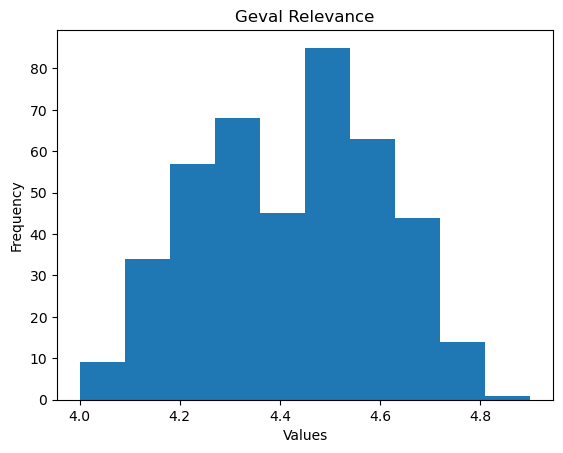

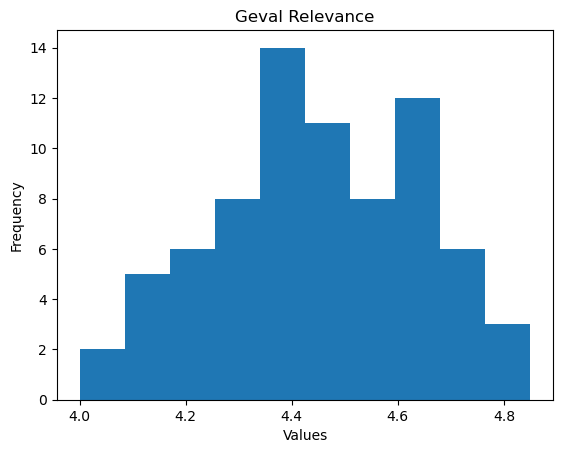

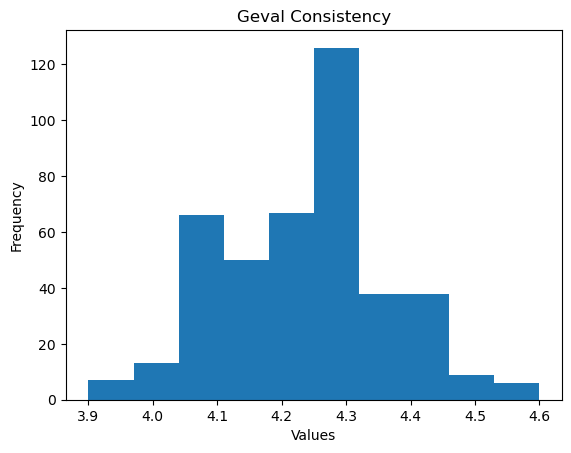

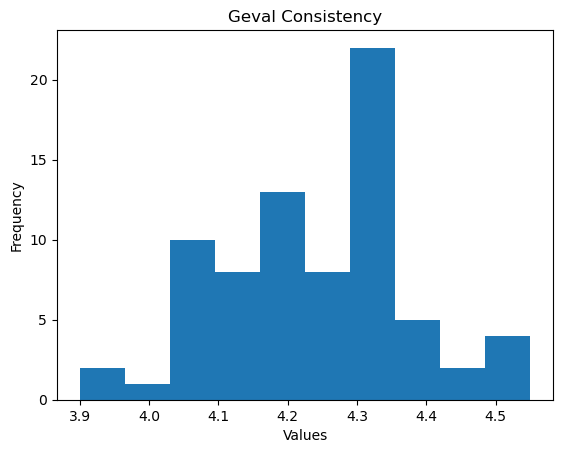

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(relevance_df["geval_relevance"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Relevance")
plt.show()

plt.hist(base_prompt_df["geval_relevance"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Relevance")
plt.show()

plt.hist(relevance_df["geval_consistency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Consistency")
plt.show()

plt.hist(base_prompt_df["geval_consistency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Consistency")
plt.show()

#### Split results by modifier into separate dataframes

In [6]:
dataframes = [base_prompt_df]

for modifier in RELEVANCE_MODIFIERS:
    modifier_df = relevance_df[relevance_df["prompt_template"] == modifier]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")



####### 30 tries per modifier #######



#### To evaluate: entailment, errors, geval_fluency, geval_coherence

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = df[metric].apply(lambda x: np.mean(json.loads(x)))


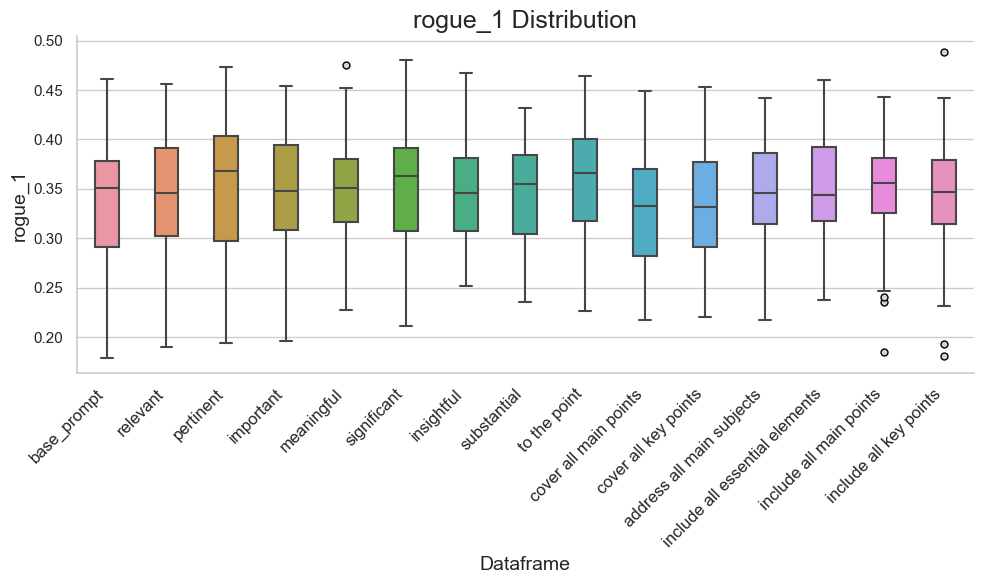

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = df[metric].apply(lambda x: np.mean(json.loads(x)))


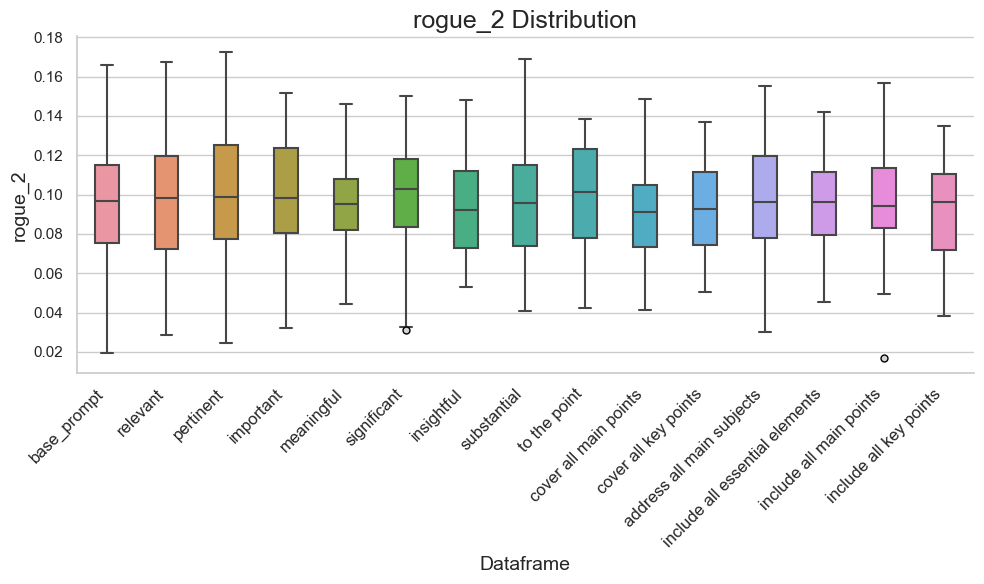

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = df[metric].apply(lambda x: np.mean(json.loads(x)))


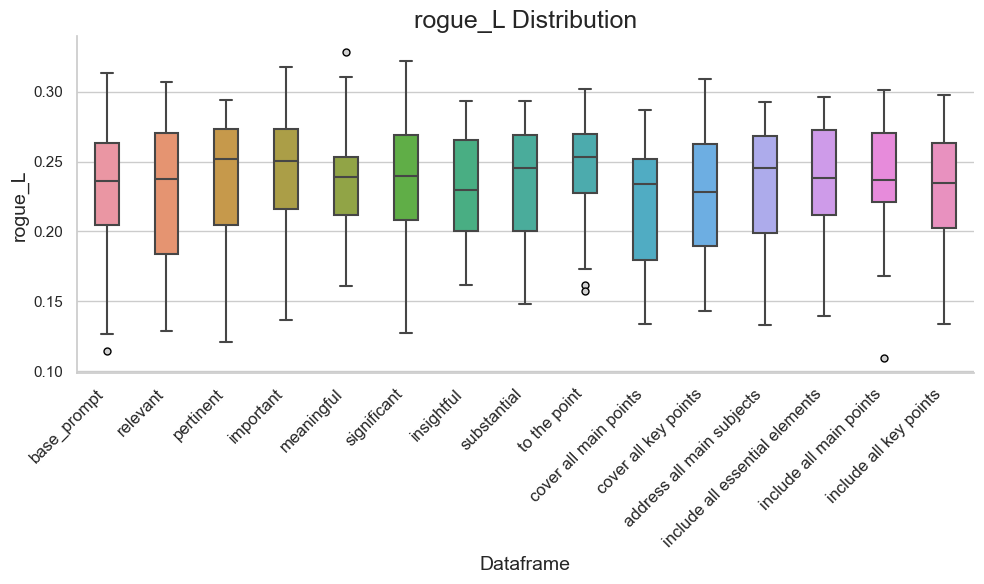

c:\Users\Erlend\git\gpt-prompt-engineering\insight_utils.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = df[metric].apply(lambda x: np.mean(json.loads(x)))


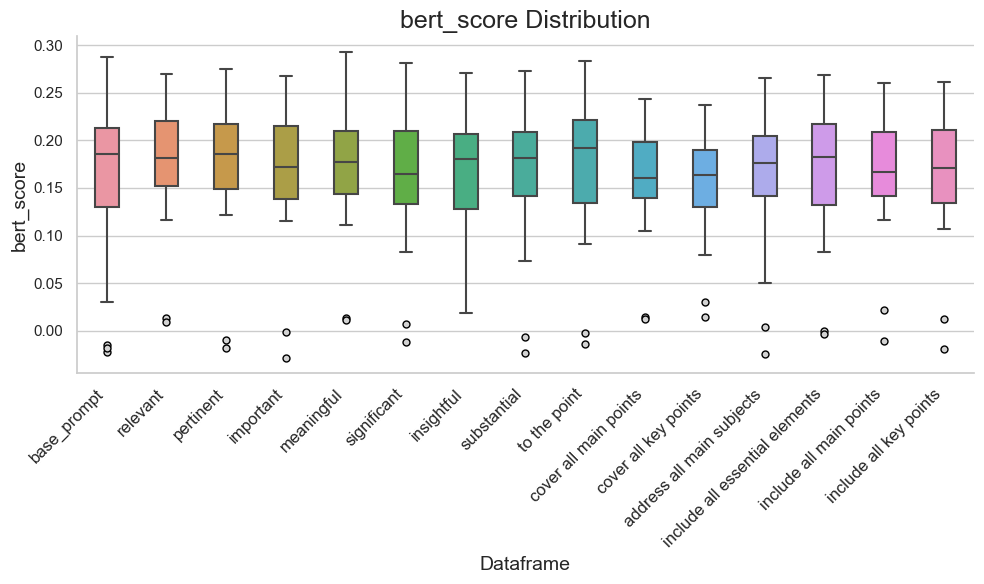

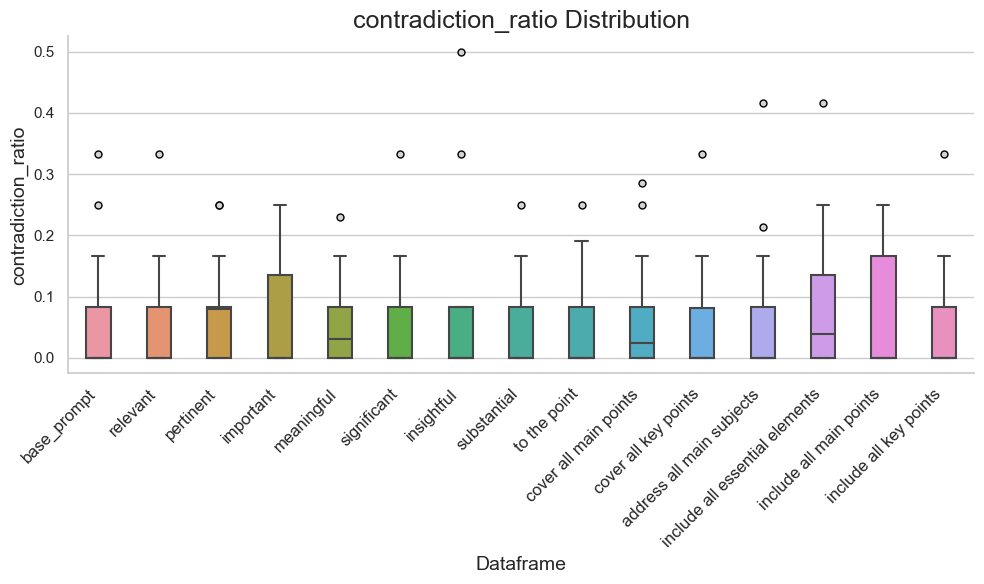

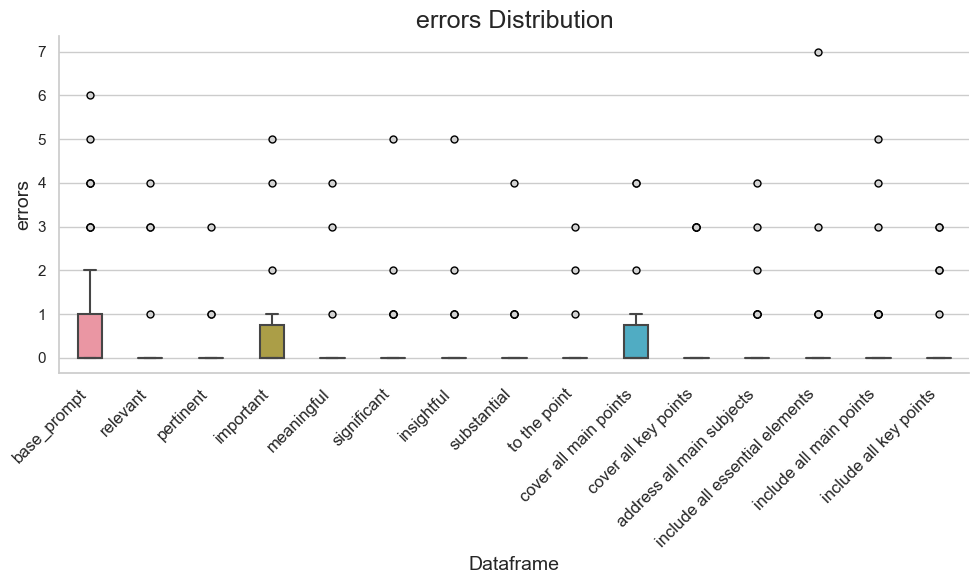

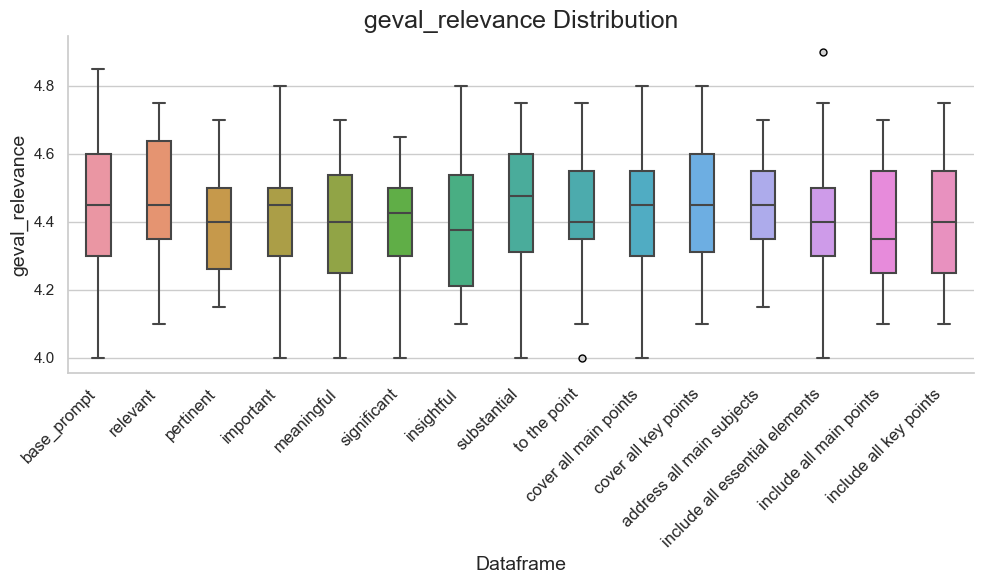

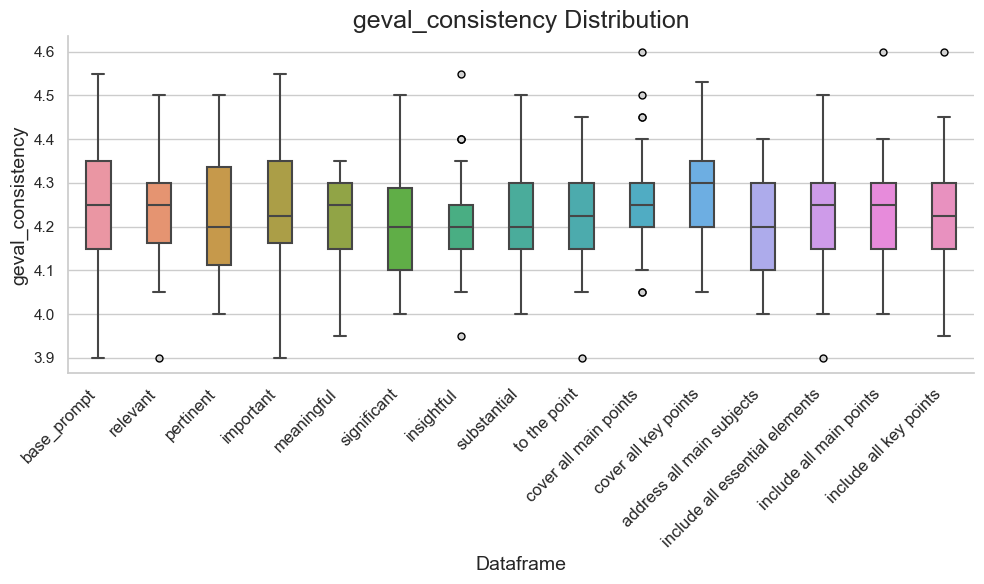

In [7]:
evaluate = [
        "rogue_1",
        "rogue_2",
        "rogue_L",
        "bert_score",
        "contradiction_ratio",
        "errors",
        "geval_relevance",
        "geval_consistency",
    ]

for eval in evaluate:
    box_plot(dataframes, ["base_prompt"] + RELEVANCE_MODIFIERS, eval)


# dic = {}

# for i, df in enumerate(dataframes):
    # success_rate = (df["three_by_three"].sum() / 30) * 100
    # modifier = QUALITY_MODIFIERS[i]
    # dic.update({modifier: round(success_rate)})

# sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
# result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

# print(result_df.style.to_latex())